<a href="https://colab.research.google.com/github/Shubham-1230/Stock-Price-Prediction/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import pandas_datareader.data as web
from matplotlib import style
import matplotlib.pyplot as plt
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import datetime as dt
plt.style.use('fivethirtyeight')

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=b65fe0641e0de7faf5f5cb86d3f384161ae4c4128135fabd687012725a2a61ce
  Stored in directory: /tmp/pip-ephem-wheel-cache-0kuxoadv/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [12]:
style.use('ggplot')

start = dt.datetime(1996,1,1)
end = dt.datetime(2020,5,8)

df = web.DataReader('TATAMOTORS.NS', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1996-01-01,72.819603,72.340599,72.436401,72.819603,40703.0,15.483592
1996-01-02,73.567001,72.053101,72.819603,72.398003,100976.0,15.393948
1996-01-03,72.819603,72.100998,72.398003,72.158501,29745.0,15.343023
1996-01-04,72.244698,71.190804,72.158501,71.612396,104889.0,15.226908
1996-01-05,71.823196,71.094902,71.612396,71.353699,62620.0,15.171898


In [0]:
# df.to_csv('TataMotors.csv')

In [0]:
# df = pd.read_csv('TataMotors.csv', parse_dates=True, index_col=0)
# df.head()

<Figure size 1440x720 with 0 Axes>

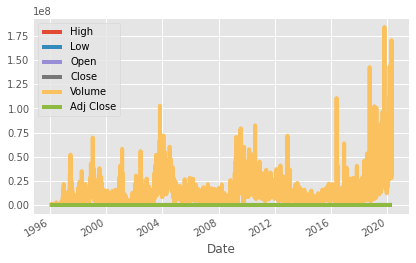

In [15]:
plt.figure(figsize=(20,10))
df.plot()

In [16]:
df['200EMA'] = df['Adj Close'].ewm(span=200).mean()
df['50EMA'] = df['Adj Close'].ewm(span=50).mean()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,200EMA,50EMA
Date,,,,,,,,
2020-05-04,87.199997,81.500000,87.000000,83.900002,91159477.0,83.900002,140.270270,97.180529
2020-05-05,86.800003,80.400002,86.000000,80.900002,57122148.0,80.900002,139.679522,96.542077
2020-05-06,83.949997,80.349998,81.550003,83.199997,53739248.0,83.199997,139.117536,96.018859
2020-05-07,84.650002,82.099998,82.900002,82.500000,31159970.0,82.500000,138.554178,95.488707
2020-05-08,84.949997,80.550003,84.500000,81.050003,35362751.0,81.050003,137.981997,94.922484


In [17]:
df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
200EMA       0
50EMA        0
dtype: int64

In [0]:
df_ohlc = df[['Open', 'Close', 'High', 'Low']]
df_ohlc.index = df_ohlc.index.map(mdates.date2num)
values = np.hstack((np.array(df_ohlc.index).reshape(-1,1), df_ohlc.values))
df_volume = df['Volume']
# df_ohlc.tail()
# df_volume.head()

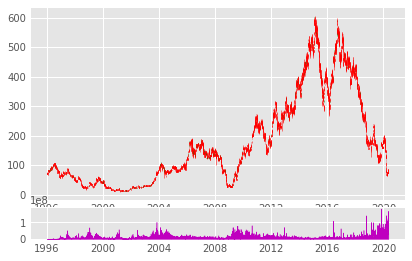

In [28]:
# plt.figure(figsize=(20,15))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

# plt.figure(figsize=(10,10))
candlestick_ohlc(ax1, values, width=2, colorup='g',alpha=1.0)
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0, color='m')
plt.show()